# GebPy Tutorials
## Mineral Analysis - Feldspars

In [1]:
import os, sys
currentdir = os.path.dirname(os.path.realpath("Minerals.ipynb"))
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

In [2]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
from modules.minerals import feldspars
import ternary

### Introduction 

Hello, this Jupyter notebook wants to show you some possible features and possibilites concerning the simulation and data analysis of GebPy's mineralogy module called "minerals". For this purpose, the minerals of the feldspar group are simulated exemplarly here. 

In [3]:
n_samples = 100

data = feldspars()
data_kfs = []
data_pl = []
data_k = []
data_na = [[], []]
data_ca = []
for i in range(n_samples):
    data = feldspars()
    kfs_sim = data.alkalifeldspar(keyword="None")
    pl_sim = data.plagioclase(keyword="None")
    data_kfs.append([kfs_sim[0], kfs_sim[1][0], kfs_sim[2], kfs_sim[5][0], kfs_sim[5][2], kfs_sim[4][0], kfs_sim[4][1], kfs_sim[6][0], kfs_sim[6][1], kfs_sim[6][2], kfs_sim[6][3], kfs_sim[6][4]])
    data_pl.append([pl_sim[0], pl_sim[1][0], pl_sim[2], pl_sim[5][0], pl_sim[5][2], pl_sim[4][0], pl_sim[4][1], pl_sim[6][0], pl_sim[6][1], pl_sim[6][2], pl_sim[6][3], pl_sim[6][4]])
    data_k.append(kfs_sim[1][1])
    data_na[0].append(1-kfs_sim[1][1])
    data_na[1].append(1-pl_sim[1][1])
    data_ca.append(1-pl_sim[1][1])

df_kfs = pd.DataFrame(data_kfs, columns=["NAME", "M", "RHOB", "GR", "U", "VP", "VS", "O", "Na", "Al", "Si", "K"])
df_pl = pd.DataFrame(data_pl, columns=["NAME", "M", "RHOB", "GR", "U", "VP", "VS", "O", "Na", "Al", "Si", "Ca"])

In [4]:
df_kfs.round(decimals=4)

,NAME,M,RHOB,GR,U,VP,VS,O,Na,Al,Si,K
0,Sa,272.04,2589.7,140.27,6.31,8360.7,4988.2,0.4705,0.0330,0.0992,0.3097,0.0877
1,Sa,271.40,2591.4,131.38,6.19,8379.9,4998.1,0.4716,0.0364,0.0994,0.3104,0.0821
2,Sa,273.33,2586.5,157.92,6.54,8322.2,4968.1,0.4683,0.0261,0.0987,0.3082,0.0987
3,Sa,274.62,2583.2,175.40,6.78,8283.4,4947.9,0.4661,0.0193,0.0983,0.3068,0.1096
4,Sa,274.78,2582.8,177.57,6.81,8278.6,4945.4,0.4658,0.0184,0.0982,0.3066,0.1110
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sa,271.40,2591.4,131.38,6.19,8379.9,4998.1,0.4716,0.0364,0.0994,0.3104,0.0821
96,Mc,277.36,2576.2,212.01,7.26,8200.1,4904.5,0.4615,0.0050,0.0973,0.3038,0.1325
97,Sa,269.14,2597.1,99.94,5.77,8446.4,5032.8,0.4756,0.0487,0.1003,0.3130,0.0625
98,Ano,266.57,2603.7,63.36,5.27,8521.4,5072.0,0.4801,0.0630,0.1012,0.3161,0.0396


In [5]:
df_kfs.describe().round(decimals=4)

,M,RHOB,GR,U,VP,VS,O,Na,Al,Si,K
count,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000
mean,271.0810,2592.2010,125.9123,6.1112,8387.6470,5002.2570,0.4723,0.0386,0.0996,0.3109,0.0787
std,4.5604,11.6431,63.3530,0.8519,134.9695,70.3614,0.0080,0.0247,0.0017,0.0052,0.0396
min,262.5400,2574.1000,4.7700,4.4700,8175.3000,4891.7000,0.4601,0.0008,0.0970,0.3029,0.0030
25%,267.4575,2583.1000,76.0125,5.4450,8282.2000,4947.2750,0.4660,0.0191,0.0983,0.3068,0.0475
50%,271.3200,2591.6000,130.2650,6.1750,8382.2500,4999.3500,0.4718,0.0368,0.0995,0.3105,0.0814
75%,274.6600,2601.5000,175.9425,6.7875,8495.7250,5058.5250,0.4786,0.0580,0.1009,0.3150,0.1100
max,278.1700,2614.0000,222.6400,7.4100,8636.5000,5132.2000,0.4875,0.0858,0.1028,0.3209,0.1392


In [6]:
df_pl.round(decimals=4)

,NAME,M,RHOB,GR,U,VP,VS,O,Na,Al,Si,Ca
0,Andes,267.97,2664.9,0,5.93,8701.5,5150.7,0.4776,0.0549,0.1369,0.2767,0.0538
1,Ab,263.18,2623.2,0,4.66,8655.1,5139.3,0.4863,0.0821,0.1087,0.3137,0.0091
2,Byt,275.01,2726.1,0,7.78,8766.4,5166.8,0.4654,0.0167,0.1766,0.2247,0.1166
3,Lab,273.09,2709.4,0,7.28,8749.1,5162.5,0.4687,0.0269,0.1660,0.2386,0.0998
4,Andes,270.21,2684.4,0,6.52,8722.5,5155.9,0.4737,0.0425,0.1498,0.2598,0.0742
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Ab,263.34,2624.6,0,4.71,8656.7,5139.7,0.4860,0.0812,0.1096,0.3125,0.0107
96,Andes,269.57,2678.8,0,6.35,8716.5,5154.4,0.4748,0.0461,0.1461,0.2646,0.0684
97,Olg,266.70,2653.8,0,5.59,8689.3,5147.7,0.4799,0.0621,0.1295,0.2864,0.0421
98,Olg,266.86,2655.2,0,5.64,8690.8,5148.1,0.4796,0.0612,0.1304,0.2852,0.0436


In [7]:
df_pl.describe().round(decimals=4)

,M,RHOB,GR,U,VP,VS,O,Na,Al,Si,Ca
count,100.0000,100.0000,100.0,100.0000,100.0000,100.000,100.0000,100.0000,100.0000,100.0000,100.0000
mean,269.0537,2674.2740,0.0,6.2124,8710.9690,5153.086,0.4758,0.0493,0.1427,0.2691,0.0630
std,4.3751,38.0727,0.0,1.1528,41.0449,10.159,0.0077,0.0241,0.0250,0.0328,0.0396
min,262.3800,2616.2000,0.0,4.4500,8647.2000,5137.300,0.4606,0.0017,0.1039,0.2042,0.0015
25%,265.4200,2642.6000,0.0,5.2500,8676.9000,5144.700,0.4694,0.0293,0.1220,0.2418,0.0302
50%,268.7700,2671.8000,0.0,6.1400,8709.0000,5152.600,0.4762,0.0505,0.1415,0.2706,0.0611
75%,272.6500,2705.5500,0.0,7.1600,8745.0500,5161.500,0.4822,0.0693,0.1635,0.2963,0.0960
max,277.8800,2751.1000,0.0,8.5300,8792.1000,5173.200,0.4878,0.0867,0.1923,0.3200,0.1413


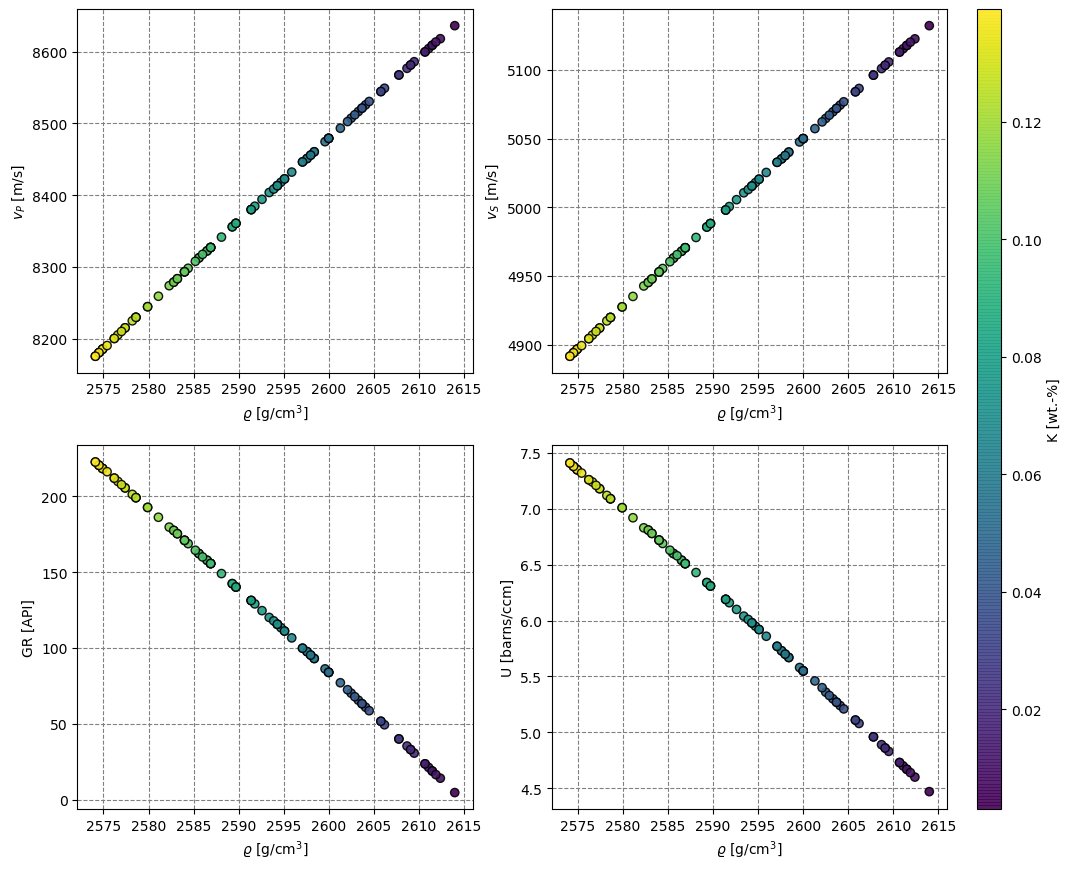

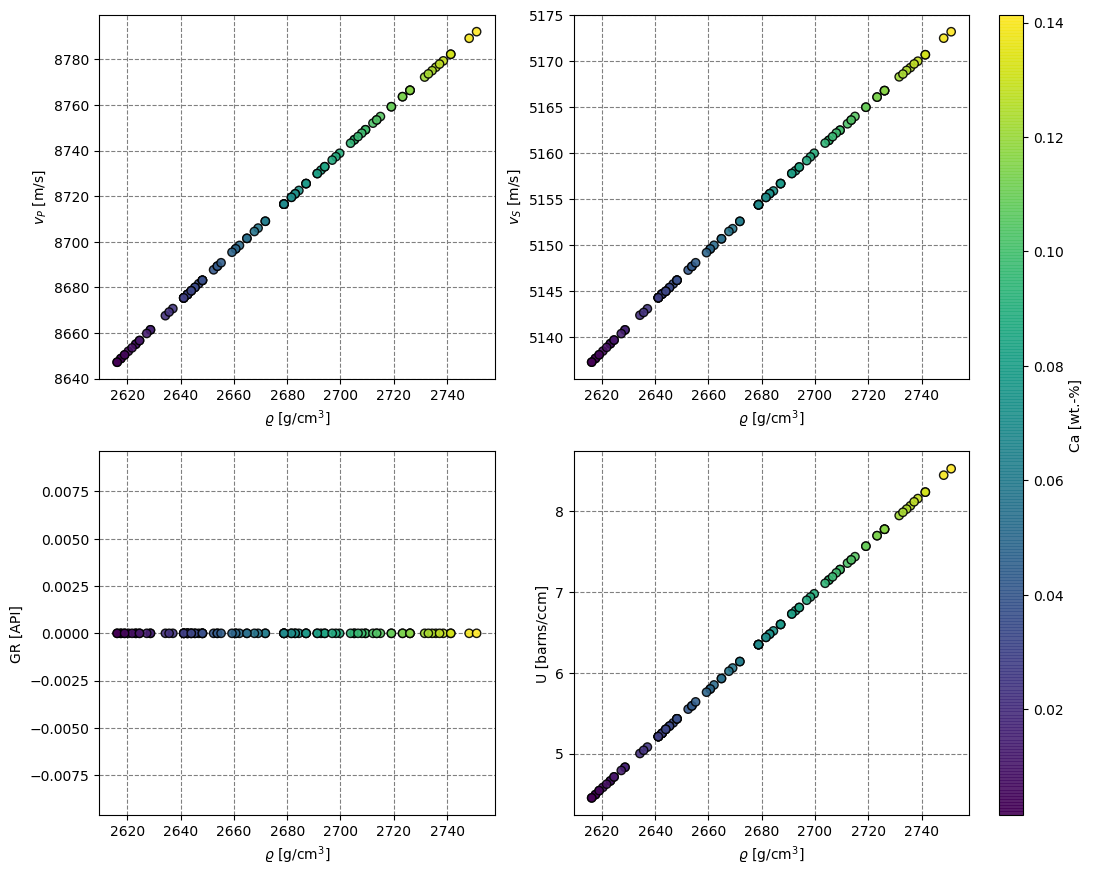

In [8]:
fig, axs = plt.subplots(2, 2, dpi=100, figsize=(12,10))

for i in range(2):
    for j in range(2):
        axs[i,j].set_xlabel("$\\varrho$ [g/cm$^3$]")
        axs[i,j].grid(color="grey", linestyle="dashed")
        axs[i,j].set_axisbelow(True)

im = axs[0,0].scatter(df_kfs["RHOB"], df_kfs["VP"], c=df_kfs["K"], cmap="viridis", edgecolors="black", alpha=0.9)
axs[0,0].set_ylabel("$v_P$ [m/s]")
im = axs[0,1].scatter(df_kfs["RHOB"], df_kfs["VS"], c=df_kfs["K"], cmap="viridis", edgecolors="black", alpha=0.9)
axs[0,1].set_ylabel("$v_S$ [m/s]")
im = axs[1,0].scatter(df_kfs["RHOB"], df_kfs["GR"], c=df_kfs["K"], cmap="viridis", edgecolors="black", alpha=0.9)
axs[1,0].set_ylabel("GR [API]")
im = axs[1,1].scatter(df_kfs["RHOB"], df_kfs["U"], c=df_kfs["K"], cmap="viridis", edgecolors="black", alpha=0.9)
axs[1,1].set_ylabel("U [barns/ccm]")

fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.825, wspace=0.2, hspace=0.2)
cb_ax = fig.add_axes([0.85, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label("K [wt.-%]")

#plt.savefig("Tutorial_Minerals-Feldspars_01.png", bbox_inches="tight")
plt.show()

fig, axs = plt.subplots(2, 2, dpi=100, figsize=(12,10))

for i in range(2):
    for j in range(2):
        axs[i,j].set_xlabel("$\\varrho$ [g/cm$^3$]")
        axs[i,j].grid(color="grey", linestyle="dashed")
        axs[i,j].set_axisbelow(True)

im = axs[0,0].scatter(df_pl["RHOB"], df_pl["VP"], c=df_pl["Ca"], cmap="viridis", edgecolors="black", alpha=0.9)
axs[0,0].set_ylabel("$v_P$ [m/s]")
im = axs[0,1].scatter(df_pl["RHOB"], df_pl["VS"], c=df_pl["Ca"], cmap="viridis", edgecolors="black", alpha=0.9)
axs[0,1].set_ylabel("$v_S$ [m/s]")
im = axs[1,0].scatter(df_pl["RHOB"], df_pl["GR"], c=df_pl["Ca"], cmap="viridis", edgecolors="black", alpha=0.9)
axs[1,0].set_ylabel("GR [API]")
im = axs[1,1].scatter(df_pl["RHOB"], df_pl["U"], c=df_pl["Ca"], cmap="viridis", edgecolors="black", alpha=0.9)
axs[1,1].set_ylabel("U [barns/ccm]")

fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.825, wspace=0.2, hspace=0.2)
cb_ax = fig.add_axes([0.85, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label("Ca [wt.-%]")

#plt.savefig("Tutorial_Minerals-Feldspars_02.png", bbox_inches="tight")
plt.show()

In [9]:
d_kfs = {"K": data_k, "Na": data_na[0], "Ca": np.zeros(len(data_k))}
d_pl = {"K": np.zeros(len(data_k)), "Na": data_na[1], "Ca": data_ca}
df_kfs_ternary = pd.DataFrame(data=d_kfs)
df_pl_ternary = pd.DataFrame(data=d_pl)

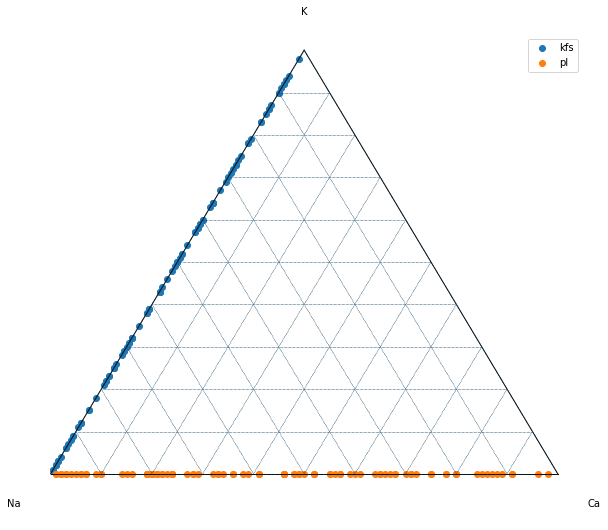

In [10]:
fig, tax = ternary.figure(scale=1)
fig.set_size_inches(10, 9)
tax.boundary(linewidth=1.0)
tax.gridlines(color="black", multiple=0.1)

tax.scatter(df_kfs_ternary[["Ca", "K", "Na"]].values, label="kfs")
tax.scatter(df_pl_ternary[["Ca", "K", "Na"]].values,  label="pl")
#tax.scatter([Q], label="Qz")
#tax.scatter([F], label="F")
#tax.scatter([L], label="L")
tax.gridlines(multiple=0.1)
tax.get_axes().axis('off')
tax.top_corner_label("K")
tax.left_corner_label("Na")
tax.right_corner_label("Ca")
tax.legend()

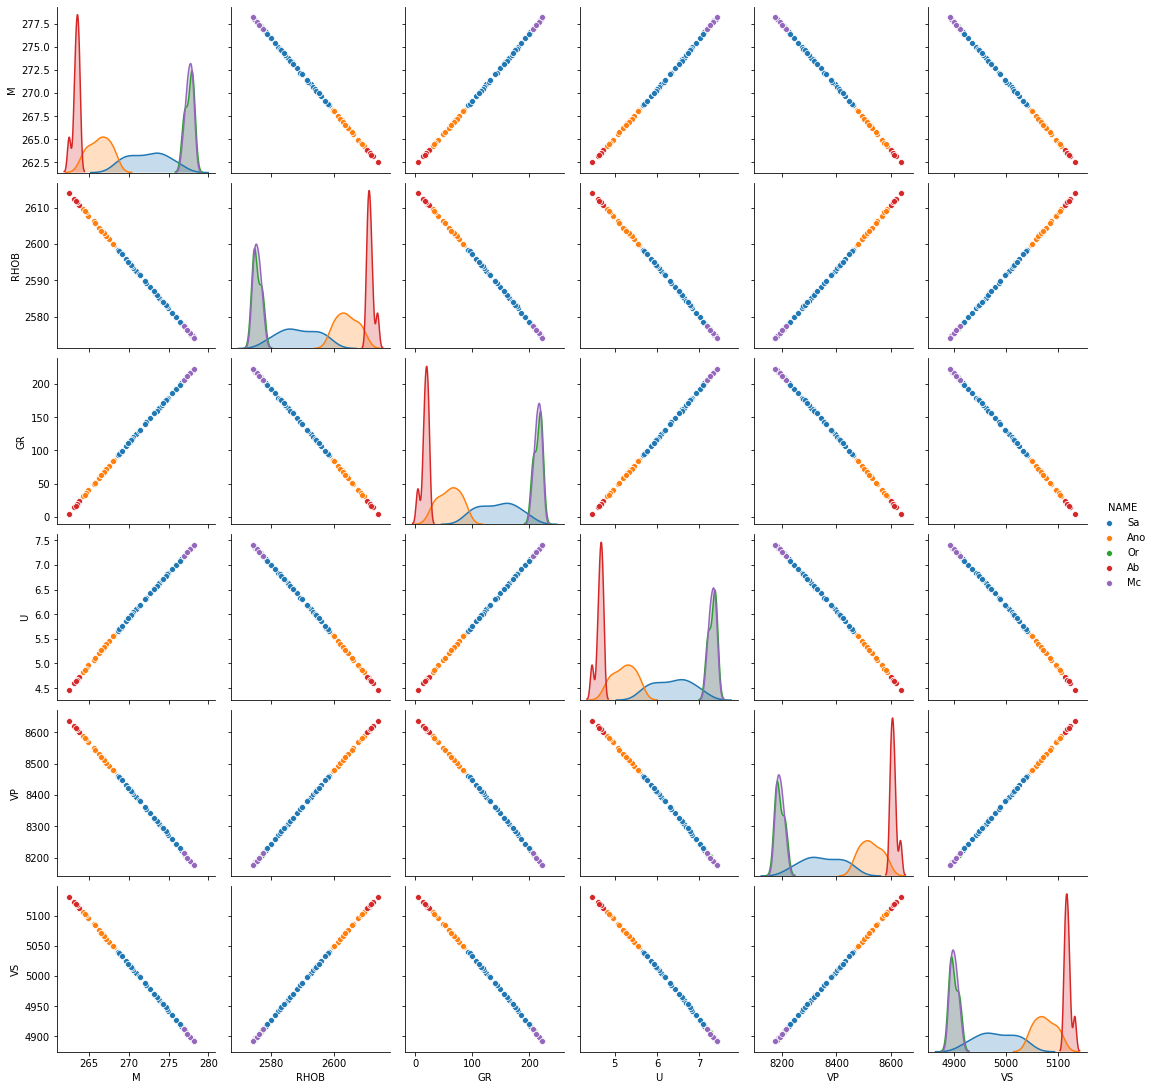

In [28]:
sns.pairplot(df_kfs.iloc[:, :7], hue="NAME", diag_kind="kde")
#savef = plt.savefig("Correlation-Plot-Kfs.png", dpi=300, bbox_inches='tight',pad_inches = 0.25)
plt.show()

/Users/mabeeskow/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/mabeeskow/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/mabeeskow/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/mabeeskow/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/mabeeskow/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/mab

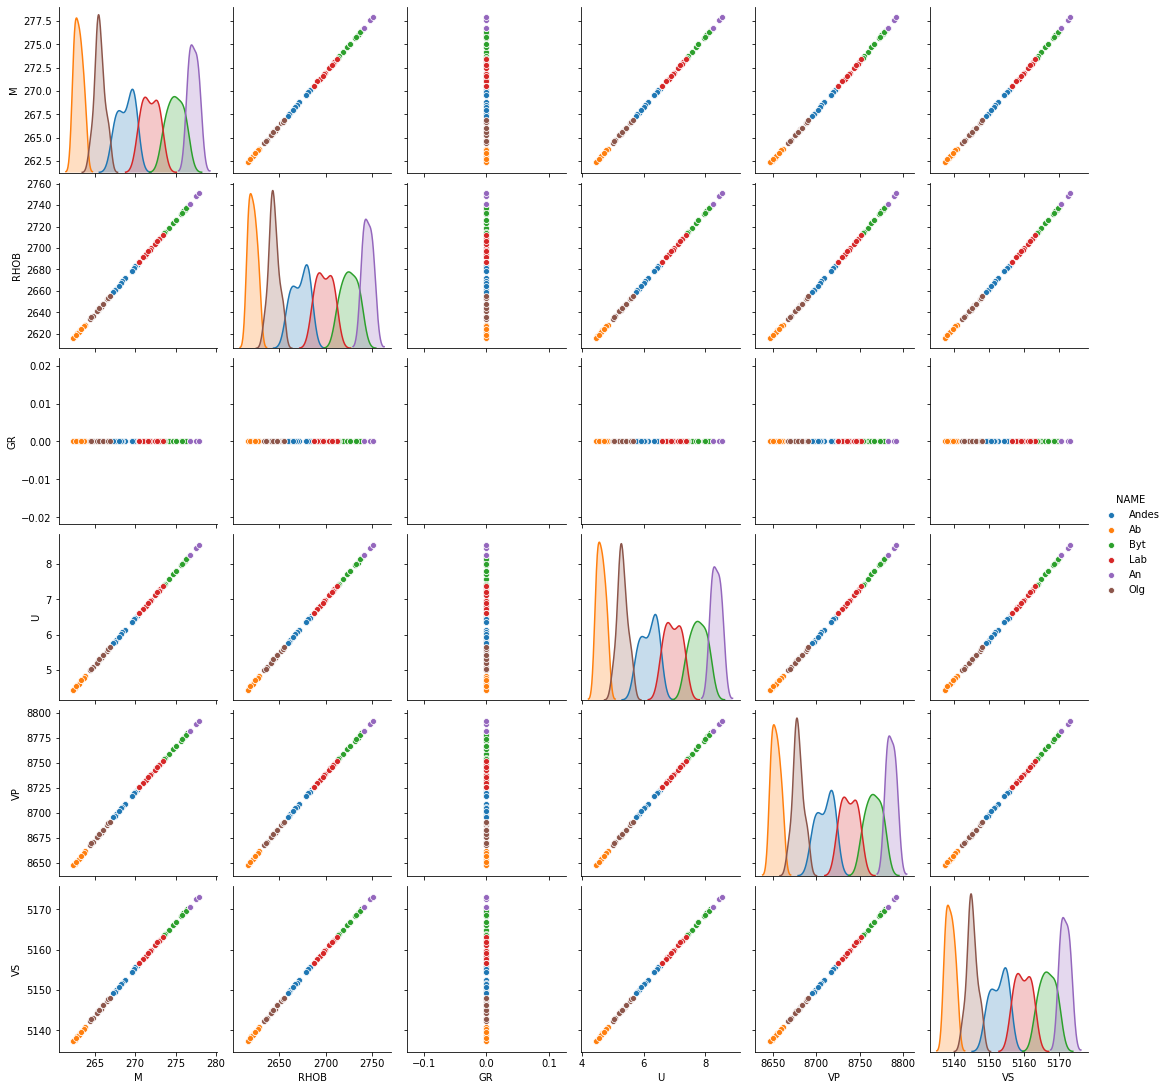

In [29]:
sns.pairplot(df_pl.iloc[:, :7], hue="NAME", diag_kind="kde")
#savef = plt.savefig("Correlation-Plot-Kfs.png", dpi=300, bbox_inches='tight',pad_inches = 0.25)
plt.show()